In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
digits=datasets.load_digits()
X=digits.data
y=digits.target.copy()

## 将数据处理成二分类问题

In [4]:
y[digits.target==9]=1
y[digits.target!=9]=0

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [6]:
X_train.shape

(1347L, 64L)

In [7]:
X_test.shape

(450L, 64L)

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_predict=log_reg.predict(X_test)

In [10]:
log_reg.score(X_test,y_test)

0.98222222222222222

### 计算F1分数

In [11]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix

In [12]:
print 'confusion_matrix:',confusion_matrix(y_test,y_predict)
print 'recall_score:',recall_score(y_test,y_predict)
print 'precision_score:',precision_score(y_test,y_predict)
print 'f1_score:',f1_score(y_test,y_predict)


confusion_matrix: [[404   3]
 [  5  38]]
recall_score: 0.883720930233
precision_score: 0.926829268293
f1_score: 0.904761904762


### 通过调整决策边界均衡精准率和召回率

In [13]:
decisoin_scores=log_reg.decision_function(X_test)

In [14]:
decisoin_scores.min()

-65.644504448466876

In [15]:
decisoin_scores.max()

13.012238824473318

In [16]:
y_predict_2=np.array(decisoin_scores>5,dtype='int')

In [17]:
y_predict_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [18]:
print 'confusion_matrix_2:',confusion_matrix(y_test,y_predict_2)
print 'recall_score_2:',recall_score(y_test,y_predict_2)
print 'precision_score_2:',precision_score(y_test,y_predict_2)
print 'f1_score_2:',f1_score(y_test,y_predict_2)


confusion_matrix_2: [[407   0]
 [ 21  22]]
recall_score_2: 0.511627906977
precision_score_2: 1.0
f1_score_2: 0.676923076923


In [19]:
y_predict_3=np.array(decisoin_scores>-5,dtype='int')
print 'confusion_matrix_3:',confusion_matrix(y_test,y_predict_3)
print 'recall_score_3:',recall_score(y_test,y_predict_3)
print 'precision_score_3:',precision_score(y_test,y_predict_3)
print 'f1_score_3:',f1_score(y_test,y_predict_3)


confusion_matrix_3: [[383  24]
 [  2  41]]
recall_score_3: 0.953488372093
precision_score_3: 0.630769230769
f1_score_3: 0.759259259259


### 可视化精准率和召回率的变化关系

In [20]:
thresholds=np.arange(np.min(decisoin_scores),np.max(decisoin_scores),0.1)

In [21]:
precisions=[]
recalls=[]
for i in thresholds:
    y_predict=np.array(decisoin_scores>i,dtype='int')
    recalls.append(recall_score(y_test,y_predict))
    precisions.append(precision_score(y_test,y_predict))

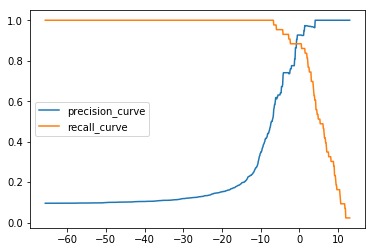

In [22]:
plt.plot(thresholds,precisions,label='precision_curve')
plt.plot(thresholds,recalls,label='recall_curve')
plt.legend()
plt.show()

### 可视化精准率-召回率曲线

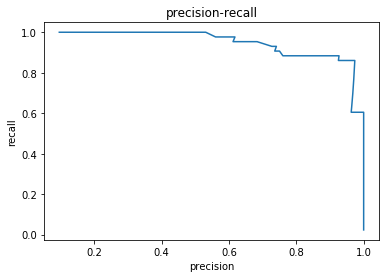

In [23]:
plt.plot(precisions,recalls)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision-recall')
plt.show()

### 使用sklearn封装的方法绘制曲线：
- 注意返回的threasholds,precisions,recalls的shape值
- sklearn会自动设置合适的thresholds的步长

In [24]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_test,decisoin_scores)

In [25]:
print precisions.shape
print recalls.shape
print thresholds.shape

(77L,)
(77L,)
(76L,)


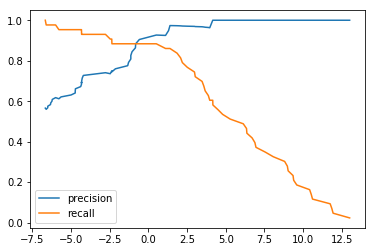

In [26]:
plt.plot(thresholds,precisions[:-1],label='precision')
plt.plot(thresholds,recalls[:-1],label='recall')
plt.legend()
plt.show()

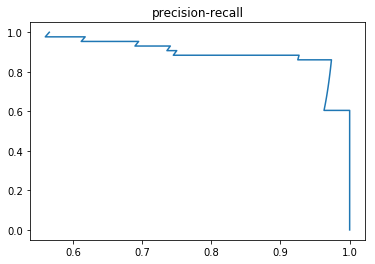

In [27]:
plt.plot(precisions,recalls)
plt.title('precision-recall')
plt.show()

### note:
使用两组不同的超参数训练的两个模型的precision-recall曲线的位置，可以判断两组超参数对应模型的优劣

### ROC曲线：Receiver Operation Characteristic Curve

TPR=recall=TP/TP+FN
FPR=FP/TN+FP

In [28]:
from sklearn.metrics import roc_curve
fprs,tprs,thresholds=roc_curve(y_test,decisoin_scores)

In [29]:
print fprs.shape
print tprs.shape
print thresholds.shape

(17L,)
(17L,)
(17L,)


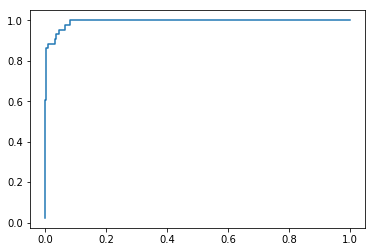

In [30]:
plt.plot(fprs,tprs)
plt.show()

### 计算ROC曲线下的面积

In [32]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,decisoin_scores)
print u"ROC曲线面积为：",auc

ROC曲线面积为： 0.993257528141


### note:roc曲线对非常有偏的数据并不敏感，对于有偏的数据需要使用precision-recall曲线。


# -------------------------------------------------------------------------------

## 多分类问题的混淆矩阵

In [34]:
X=digits.data
y=digits.target
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [35]:
log_reg_multi_labels=LogisticRegression()
log_reg_multi_labels.fit(X_train,y_train)
print log_reg_multi_labels.score(X_test,y_test)

0.957777777778


In [49]:
y_predict=log_reg_multi_labels.predict(X_test)

conf_mat=confusion_matrix(y_test,y_predict)
print conf_mat

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  1  0  0  0  1  0]
 [ 0  0 54  1  0  0  0  0  1  0]
 [ 0  0  0 45  0  2  0  0  0  0]
 [ 0  1  0  0 44  0  0  0  0  0]
 [ 0  2  0  0  0 39  0  0  0  0]
 [ 0  1  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  4  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 44]]


In [50]:
### precision and recall 
print precision_score(y_test,y_predict,average='micro')
print recall_score(y_test,y_predict,average='micro')

0.957777777778
0.957777777778


### 针对预测错误可以绘制错误矩阵


In [51]:
conf_mat_sum=np.sum(conf_mat,axis=1)

In [52]:
from __future__ import division

In [53]:
err_mat=conf_mat / conf_mat_sum

In [54]:
## 将对角线的数字填充为0
np.fill_diagonal(err_mat,0)

In [55]:
err_mat

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.02222222,
         0.        ,  0.        ,  0.        ,  0.02380952,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.0212766 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02380952,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04878049,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.01960784,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.03921569,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.01960784,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

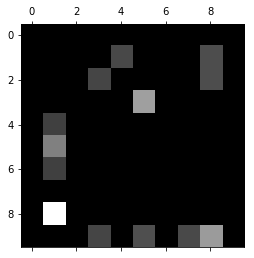

In [62]:
plt.matshow(err_mat,cmap=plt.cm.gray)
plt.show()